# Model Anaylsis Random Forest Classifier #

In [1]:
import numpy as np
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Training and Testing datasets ##

In [2]:
#Provide Training dataset path
dataset_path_training = "/Users/rakesh/Desktop/BTech_2/IML_lab/RPS/RPS_final/combined_dataset_training.pkl" 
dataset, labels = joblib.load(dataset_path_training)

In [3]:
#Provide Testing dataset path
dataset_path_testing = "/Users/rakesh/Desktop/BTech_2/IML_lab/RPS/RPS_final/RPS_cobmined_V12/combined_dataset_testing.pkl" 
dataset_test, labels_test = joblib.load(dataset_path_testing)

## Model Training ##

In [5]:
X = np.array(dataset)
y = np.array(labels)

X_train_flat = X.reshape(X.shape[0], -1)

clf = RandomForestClassifier(n_estimators=16, random_state=5)
clf.fit(X_train_flat, y)
#y_pred = clf.predict(X_test_flat)

model_name = "RF_model_9027.pkl"  
joblib.dump(clf, model_name)
print(f"Model saved as {model_name}")

Model saved as RF_model_9027.pkl


# Model Evaluation #

## Confusion Matrix ##

In [8]:
predictions=[]

for points in dataset_test:
    X_cls = np.array(points).reshape(1, -1)

    # Make predictions
    pred_class = clf.predict(X_cls)
    predictions.append(pred_class[0])

predictions_array=np.array(predictions)
print(predictions_array[:5])

['paper' 'rock' 'paper' 'scissors' 'paper']


In [9]:
labels_array=np.array(labels_test)
print(labels_array[:5])

['paper' 'rock' 'paper' 'scissors' 'paper']


In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_test=labels_array
y_pred=predictions_array

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
cr = classification_report(y_test, y_pred)
print("\nClassification Report:",)
print (cr)
acc = accuracy_score(y_test,y_pred)
print("\nAccuracy:",acc)

Confusion Matrix:
[[334  25  34]
 [  0 362  28]
 [ 20   8 372]]

Classification Report:
              precision    recall  f1-score   support

       paper       0.94      0.85      0.89       393
        rock       0.92      0.93      0.92       390
    scissors       0.86      0.93      0.89       400

    accuracy                           0.90      1183
   macro avg       0.91      0.90      0.90      1183
weighted avg       0.91      0.90      0.90      1183


Accuracy: 0.9027895181741336


In [251]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

n_est = []
acc = []

X = np.array(dataset)
y = np.array(labels)

highest_acc=[0,0]

for i in range(1, 30):  # Range starts from 1 as n_estimators must be at least 1

    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # Reshape the dataset for training
    X_train_flat = X.reshape(X.shape[0], -1)
    X_test_flat = dataset_test.reshape(dataset_test.shape[0], -1)#testing with unknown dataset 
    
    clf = RandomForestClassifier(n_estimators=i, random_state=0, bootstrap=True, max_features = 'sqrt')
    clf.fit(X_train_flat, y)
    y_pred = clf.predict(X_test_flat)
    accuracy = accuracy_score(labels_test,y_pred )

    if accuracy>highest_acc[1]:
        highest_acc[1]=accuracy
        highest_acc[0]=i

    
    n_est.append(i)
    acc.append(accuracy)

#print(n_est)
#print(acc)

plt.plot(n_est, acc)
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Random Forest Classifier: n_estimators vs. Accuracy')
plt.grid(True)
plt.ylim(0.5, 1.0)
plt.show()
print("Highest Accuracy by: ",highest_acc)

Highest Accuracy by:  [13, 0.8284023668639053]


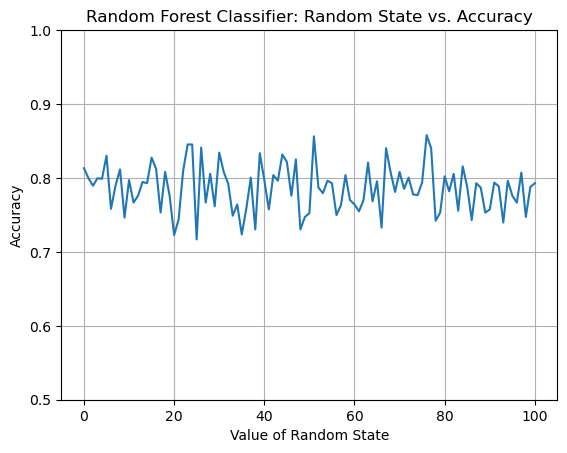

Highest Accuracy by:  [76, 0.8579881656804734]


In [252]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

n_est = []
acc = []

X = np.array(dataset)
y = np.array(labels)

highest_acc=[0,0]

for i in range(0,101):  # Range starts from 1 as n_estimators must be at least 1

    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # Reshape the dataset for training
    X_train_flat = X.reshape(X.shape[0], -1)
    X_test_flat = dataset_test.reshape(dataset_test.shape[0], -1)#testing with unknown dataset 
    
    clf = RandomForestClassifier(n_estimators=10, random_state=i, bootstrap=True, max_features = 'sqrt')
    clf.fit(X_train_flat, y)
    y_pred = clf.predict(X_test_flat)
    accuracy = accuracy_score(labels_test,y_pred )

    if accuracy>highest_acc[1]:
        highest_acc[1]=accuracy
        highest_acc[0]=i
    
    n_est.append(i)
    acc.append(accuracy)

#print(n_est)
#print(acc)

plt.plot(n_est, acc)
plt.xlabel('Value of Random State')
plt.ylabel('Accuracy')
plt.title('Random Forest Classifier: Random State vs. Accuracy')
plt.grid(True)
plt.ylim(0.5, 1.0)
plt.show()
print("Highest Accuracy by: ",highest_acc)

In [253]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

n_est = []
random_st=[]
acc = []

X = np.array(dataset)
y = np.array(labels)

highest_acc=[0,0,0]
for j in range(1,21):
    for i in range(0,101):  # Range starts from 1 as n_estimators must be at least 1
    

        X_train_flat = X.reshape(X.shape[0], -1)
        X_test_flat = dataset_test.reshape(dataset_test.shape[0], -1)#testing with unknown dataset 
        
        clf = RandomForestClassifier(n_estimators=j, random_state=i, bootstrap=True, max_features = 'sqrt')
        clf.fit(X_train_flat, y)
        y_pred = clf.predict(X_test_flat)
        accuracy = accuracy_score(labels_test,y_pred )
    
        if accuracy>highest_acc[0]:
            highest_acc[0]=accuracy
            highest_acc[1]=i
            highest_acc[2]=j
        
        n_est.append(i)
        acc.append(accuracy)
        random_st.append(j)

#print(n_est)
#print(acc)

print("Highest Accuracy by: ",highest_acc)

Highest Accuracy by:  [0.9027895181741336, 5, 16]


In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from scipy.interpolate import griddata

n_est = []
random_st = []
acc = []

X = np.array(dataset)
y = np.array(labels)

highest_acc = [0, 0, 0]

for j in range(1, 21):
    for i in range(0, 101):  
        X_train_flat = X.reshape(X.shape[0], -1)
        X_test_flat = dataset_test.reshape(dataset_test.shape[0], -1)
        
        clf = RandomForestClassifier(n_estimators=j, random_state=i, bootstrap=True, max_features='sqrt')
        clf.fit(X_train_flat, y)
        y_pred = clf.predict(X_test_flat)
        accuracy = accuracy_score(labels_test, y_pred)
    
        if accuracy > highest_acc[0]:
            highest_acc[0] = accuracy
            highest_acc[1] = i
            highest_acc[2] = j
        
        n_est.append(j)
        acc.append(accuracy)
        random_st.append(i)

print("Highest Accuracy by: ", highest_acc)

# Interpolate the data for smooth plotting
xi = np.linspace(min(random_st), max(random_st), 100)
yi = np.linspace(min(n_est), max(n_est), 100)
zi = griddata((random_st, n_est), acc, (xi[None, :], yi[:, None]), method='cubic')

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(xi, yi)
surf = ax.plot_surface(X, Y, zi, cmap='viridis', edgecolor='none')

# Set labels and title
ax.set_xlabel('Random State')
ax.set_ylabel('Number of Estimators')
ax.set_zlabel('Accuracy')
ax.set_title('3D Surface Plot: Random State vs Number of Estimators vs Accuracy')

# Add a color bar which maps values to colors
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


Highest Accuracy by:  [0.9027895181741336, 5, 16]
